In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms

### Collect data

In [4]:
DATASET_ID = 'giant_otter'

In [5]:
from avgn.visualization.projections import (
    scatter_projections,
    draw_projection_transitions,
)

In [6]:
df_loc =  DATA_DIR / 'syllable_dfs' / DATASET_ID / 'otter.pickle'

In [7]:
syllable_df = pd.read_pickle(df_loc)

In [8]:
syllable_df[:3]

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram
0,0.0,1.213917,isolation call,UNK,0,Audio_S287_isolation_call,"[-1.2798290802061346e-05, -7.027552779787061e-...",96000,"[[0.0, 0.0, 0.0, 0.0028829596, -0.009689297, 0..."
0,0.0,0.737667,close call,UNK,0,Audio_S105_close_call,"[-1.9724764766160915e-06, 9.316552547592764e-0...",96000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 2.2376324e-05, -0.0..."
0,0.0,1.098792,suckling call,UNK,0,Audio_S450_suckling_call,"[-3.1328436848193265e-06, -1.653114868834354e-...",96000,"[[0.0, 0.0, 0.0, 0.0, 0.00026210205, 0.0034825..."


In [9]:
len(syllable_df)

453

Text(0.5, 1.0, 'min')

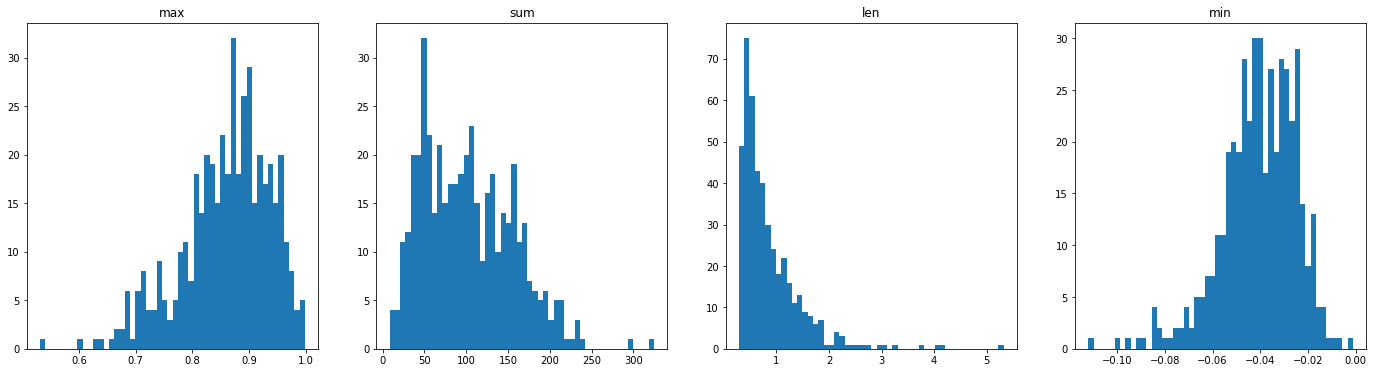

In [10]:
fig, axs = plt.subplots(ncols=4, figsize=(24,6))
axs[0].hist([np.max(i) for i in syllable_df.spectrogram.values], bins=50);axs[0].set_title('max')
axs[1].hist([np.sum(i) for i in syllable_df.spectrogram.values], bins=50);axs[1].set_title('sum')
axs[2].hist((syllable_df.end_time - syllable_df.start_time).values, bins = 50); axs[2].set_title('len')
axs[3].hist([np.min(i) for i in syllable_df.spectrogram.values], bins=50);axs[3].set_title('min')

### cluster

In [11]:
len(syllable_df)

453

In [12]:
specs = list(syllable_df.spectrogram.values)
specs = [i / np.max(i) for i in specs]
specs_flattened = flatten_spectrograms(specs)
np.shape(specs_flattened)

(453, 992)

In [13]:
fit = umap.UMAP()

In [14]:
np.shape(specs_flattened)

(453, 992)

In [15]:
z  = list(fit.fit_transform(specs_flattened))

In [16]:
z = np.vstack(z)

### variation across populations

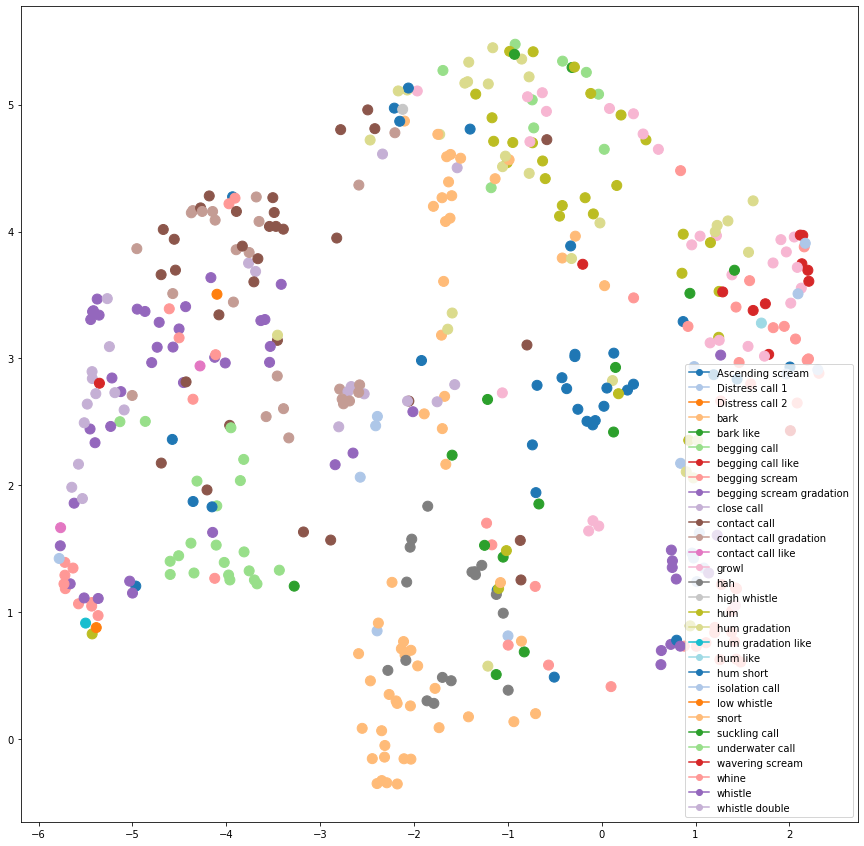

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
scatter_projections(projection=z, alpha=1, labels = syllable_df.labels.values, s=100, ax = ax)
plt.show()

In [18]:
syllable_df[:3]

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram
0,0.0,1.213917,isolation call,UNK,0,Audio_S287_isolation_call,"[-1.2798290802061346e-05, -7.027552779787061e-...",96000,"[[0.0, 0.0, 0.0, 0.0028829596, -0.009689297, 0..."
0,0.0,0.737667,close call,UNK,0,Audio_S105_close_call,"[-1.9724764766160915e-06, 9.316552547592764e-0...",96000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 2.2376324e-05, -0.0..."
0,0.0,1.098792,suckling call,UNK,0,Audio_S450_suckling_call,"[-3.1328436848193265e-06, -1.653114868834354e-...",96000,"[[0.0, 0.0, 0.0, 0.0, 0.00026210205, 0.0034825..."


### just look at a subset

In [19]:
n_top = 15

In [20]:
top_phrases = pd.DataFrame(
    {i: [sum(syllable_df.labels == i)] for i in syllable_df.labels.unique()}
).T.sort_values(by=0, ascending=False)[:n_top]
top_phrases.T

,contact call,snort,begging scream,begging scream gradation,hum,growl,hum gradation,contact call gradation,Ascending scream,begging call,bark,whine,whistle,hah,isolation call
0,32,32,32,30,30,29,29,25,25,21,21,20,19,17,16


In [21]:
top_phrases_list = list(top_phrases.index)

In [22]:
subset_sylls = syllable_df[syllable_df.labels.isin(top_phrases_list)]

In [23]:
len(subset_sylls)

378

In [24]:
specs = list(subset_sylls.spectrogram.values)
specs = [i / np.max(i) for i in specs]
specs_flattened = flatten_spectrograms(specs)
np.shape(specs_flattened)

(378, 992)

In [25]:
fit = umap.UMAP(min_dist=0.25)

In [26]:
np.shape(specs_flattened)

(378, 992)

In [27]:
z  = list(fit.fit_transform(specs_flattened))

In [28]:
z = np.vstack(z)

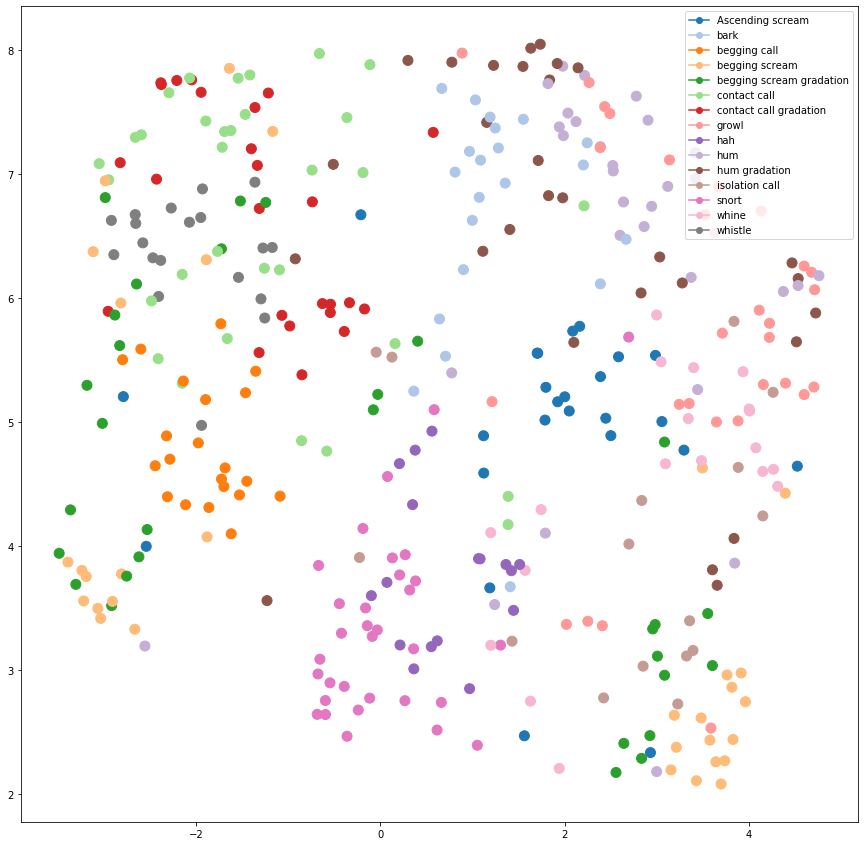

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
scatter_projections(projection=z, alpha=1, labels = subset_sylls.labels.values, s=100, ax = ax)
#ax.set_xlim([-15,15])
#ax.set_ylim([-15,15])
plt.show()

In [32]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

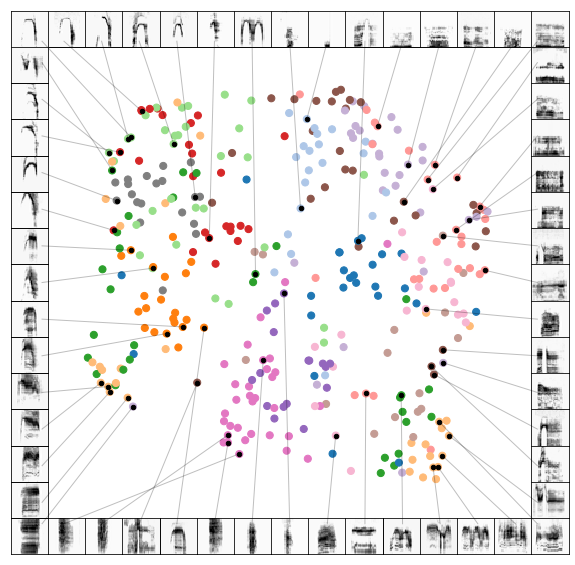

In [36]:
scatter_spec(
    z,
    specs,
    column_size=15,
    #x_range = [-5.5,7],
    #y_range = [-10,10],
    pal_color="hls",
    color_points=False,
    enlarge_points=20,
    figsize=(10, 10),
    scatter_kwargs = {
        'labels': subset_sylls.labels.values,
        'alpha':1.0,
        's': 50,
        'show_legend': False
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':1,
        'ls':"solid",
        'alpha':0.25,
    },
    draw_lines=True
);
save_fig(FIGURE_DIR / 'giant_otter_syllables', dpi=300, save_jpg=True)